# Twitter Sentimental Analysis

## Install and load modules

In [1]:
#importing libraries
import re
import warnings 
import nltk
from nltk.stem.snowball import SnowballStemmer # for Stemming word 
import pandas as pd
from sklearn.model_selection import train_test_split #for splitting data into train and test
from sklearn.feature_extraction.text import CountVectorizer #for vectorize text into sparse matrix 
from sklearn import metrics # for findin the accuracy of model 
import collections #for finding each class true prediction frequency 
from sklearn.naive_bayes import MultinomialNB # import and instantiate MultinomialNB
# from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

## Data visualization

* Read the tweets csv file into a dataframe.
* Analyse the feature columns and nature of tweets in the text column.
* Take out the **negative, positive and neutral** count values from the airline_sentiment column in the dataset.

In [2]:
df = pd.read_csv("Tweets.csv") # reading data file 
df.head()  #first five rows of data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Dropping all the neutral sentiment rows
indexNames = df[ df['airline_sentiment'] == 'neutral' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [5]:
# first five text
text = df['text']
text[0:5]

1    @VirginAmerica plus you've added commercials t...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
Name: text, dtype: object

In [6]:
# total number of negative ,neutral and positive mood
airline_sentiment  = df['airline_sentiment'].value_counts()
print (airline_sentiment)

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64


* The negative sentiment counts are significantly higher than positive ad neutral counts. 
* We need to plot those sentiment counts and visualize it to see our results more clearly..

## Plot the sentiment counts

* Now let's plot the sentiment count distribution in the dataset for the negative, positive and neutral sentiments.
* We are going to get the barplots and pie plot for airline_sentiment with respect to sentiments of tweets (positive,negative or neutral).
* This will give us a better understanding of the sentiment of the tweets about the airlines.

### Barplot for US airline Sentiment count

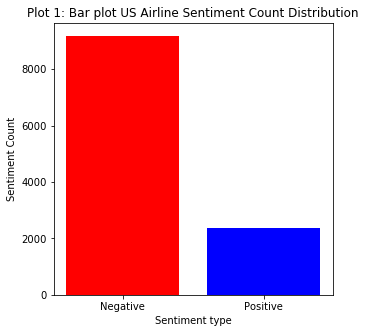

In [7]:
# bar plot for airline sentiment count in the dataset
plt.figure(figsize=(5,5))
plt.bar([1,2],airline_sentiment, color=['red', 'blue'])
plt.title("Plot 1: Bar plot US Airline Sentiment Count Distribution")
plt.xlabel("Sentiment type")
plt.ylabel("Sentiment Count")
plt.xticks([1,2],['Negative','Positive']);

### Pie plot for US Airline Sentiment count

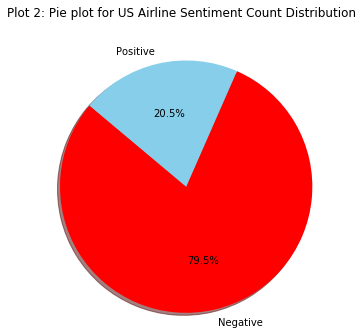

In [8]:
# pie plot for total percentage of airline sentiment
plt.figure(figsize=(5,5))
labels = 'Negative', 'Positive'
sizes = airline_sentiment.tolist()
colors = ['red', 'skyblue']
explode = (0, 0) 

# Plot
plt.suptitle("Plot 2: Pie plot for US Airline Sentiment Count Distribution",y=1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

* From the above plots we can see that the **negative** sentiment counts is around 62.7% which is the highest, followed by neutral (21.2%) and positive (16.1%) sentiment count respectively.
* Now we know that there are more negative reviews about airlines and we need to analyse more closely on the reasons for so many negative comments. 

## Airline sentiments for each airline

* Firstly lets calculate the total number of tweets for each airline
* Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
* This will give us a clearer idea about the airline sentiments , airlines relationship.

### Tweets per Airline

In [9]:
# type of airline and number of tweets for each type of airline 
airline = df['airline'].value_counts()
airline_names = df['airline'].unique().tolist()
print (airline, airline_names)

United            3125
US Airways        2532
American          2296
Southwest         1756
Delta             1499
Virgin America     333
Name: airline, dtype: int64 ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']


### Bar plot for Tweets distribution in Each Airline

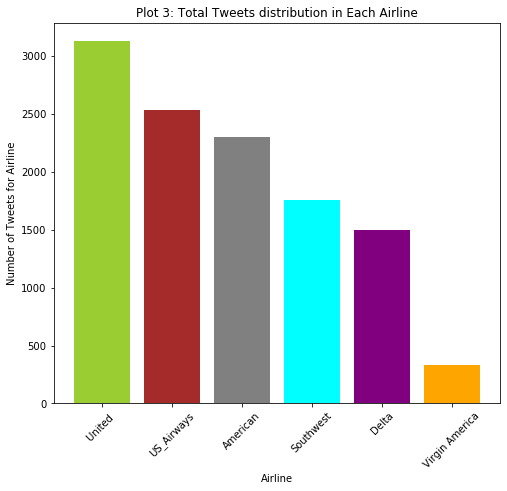

In [10]:
# let's plot of type of airline vs Total number of each type of airline
plt.figure(figsize=(8,7))
plt.bar([1,2,3,4,5,6],airline,color=['yellowgreen','brown','gray','cyan','purple','orange'])
plt.xlabel("Airline")
plt.ylabel("Number of Tweets for Airline")
plt.title("Plot 3: Total Tweets distribution in Each Airline")
plt.xticks([1,2,3,4,5,6],['United ','US_Airways','American','Southwest','Delta','Virgin America'],rotation=45);

### Pie plot for Tweets distribution in Each Airline

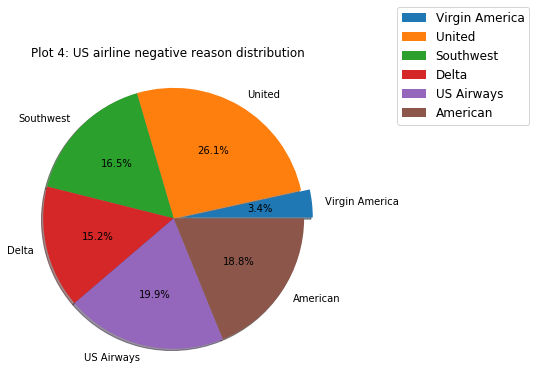

In [11]:
# pie plot for tweets per airline in the dataset
airlines = airline_names
values = [504,3822,2420,2222,2913,2759]
plt.suptitle("Plot 4: US airline negative reason distribution",y=1.1)
wedges, plt_labels, junk  = plt.pie(values,autopct='%1.1f%%',radius = 1.5,labels=airlines,\
                                   explode=[0.1,0,0,0,0,0],shadow=True)

plt.legend(wedges, airlines, bbox_to_anchor=(1.5,1.5),prop={'size':12});

### What can you say about the distribution of the US airlines of the tweets?

There are six different airlines found from the the US airline tweet dataset. The **United airline** is mentioned in 3822 tweet, which is more than any other airlines. The **Virgin America airline** is only mentioned in 504 tweet, and it is the least mentioned airline in this data set. Generally speaking, there are more negative sentiment tweet than positive one. 

### Sentiment Count distribution in Each Airline

* From Figure 1 and 2 we've seen that the **negative sentiment** tweets is more compared to the **positive** and **neutral tweets** in the dataset.
* From Figure 3 and 4 we can see the distribution of tweets for each airline in the dataset.
* Let's see how the sentiment counts are distributed for each airline..

### Bar plots of Sentiment Count for Each Airline

Total number of tweets for each airline 
  airline
United            3125
US Airways        2532
American          2296
Southwest         1756
Delta             1499
Virgin America     333
Name: airline_sentiment, dtype: int64


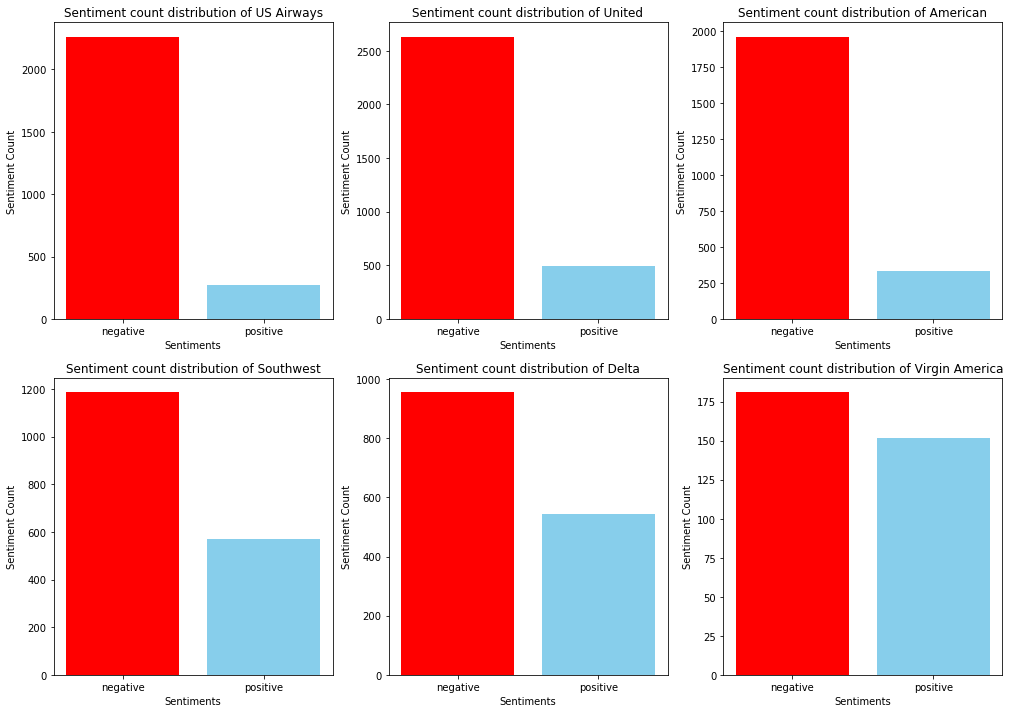

In [12]:
# bar plots for sentiment count for each airline with respect to sentiments of tweets (positive,negative or neutral).
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(17, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2]
    plt.bar(Index,count, color=['red', 'skyblue'])
    plt.xticks(Index,['negative','positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiments')
    plt.title('Sentiment count distribution of '+i)

### Bar Plot Comparison of Each Airline Sentiment Counts

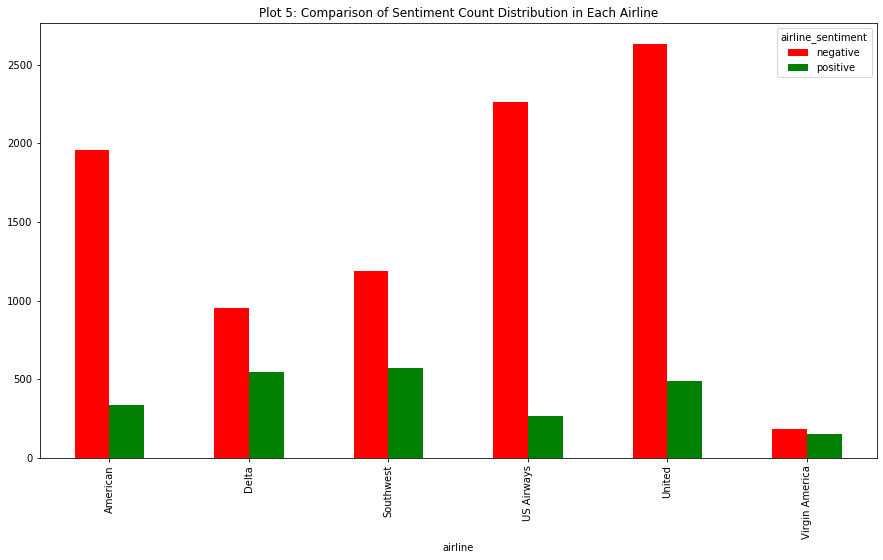

In [13]:
# plot the sentiment count of every airline in a single bar plot
df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',
                                                                   figsize=(15, 8),
                                                                   color = ['red', 'green', 'skyblue'],
                                                                   title = "Plot 5: Comparison of Sentiment Count Distribution in Each Airline");

* **United**, **US Airways**, **American** substantially get negative reactions.
* Tweets for **Virgin America** are the most balanced.

We can clearly say that on an average the negative is almost **3 times higher** than positive sentiment or the neutral which is not good for any airline.

## What are the reasons for negative sentimental tweets for each airline ?

* First we will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers.
* Next, we'll see what type of negative reasons are specific for every Airline and analyse the results. 

In [14]:
#negative reasons
negative_reason = df['negativereason'].dropna()
negative_reason_list = negative_reason.value_counts().index.tolist()
print (negative_reason_list)

['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines', 'Damaged Luggage']


In [15]:
negative_reason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

### Bar Plot for Negative Reasons in Tweets

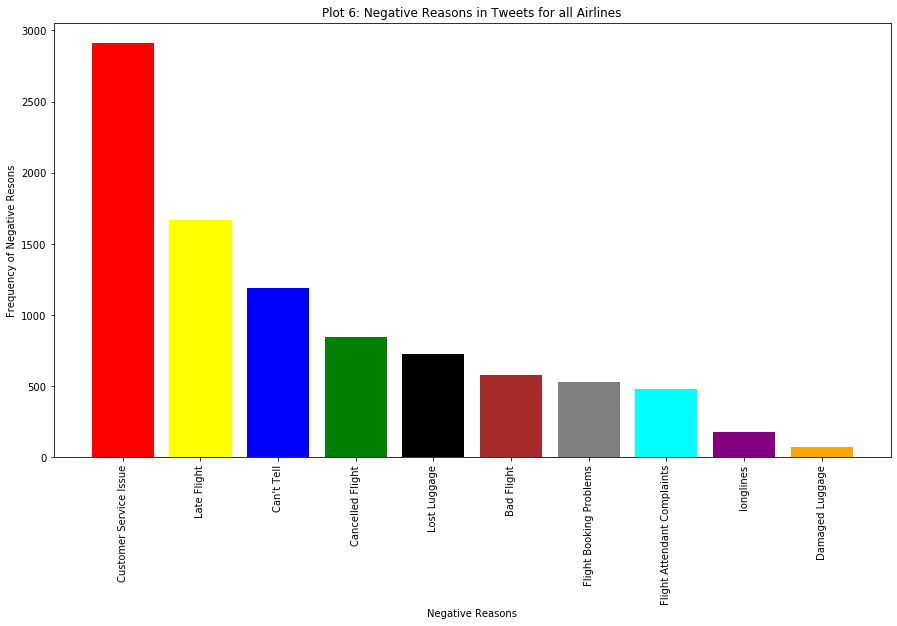

In [16]:
# All negative reasons for all flight
Index = range(1,(len(negative_reason.unique())+1))
plt.figure(figsize=(15,8))
plt.bar(Index,negative_reason.value_counts(), color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
plt.xlabel("Negative Reasons")
plt.ylabel("Frequency of Negative Resons")
plt.title("Plot 6: Negative Reasons in Tweets for all Airlines")
plt.xticks(Index,negative_reason_list,rotation = 90);

### Pie Plot for Negative Reasons in Tweets

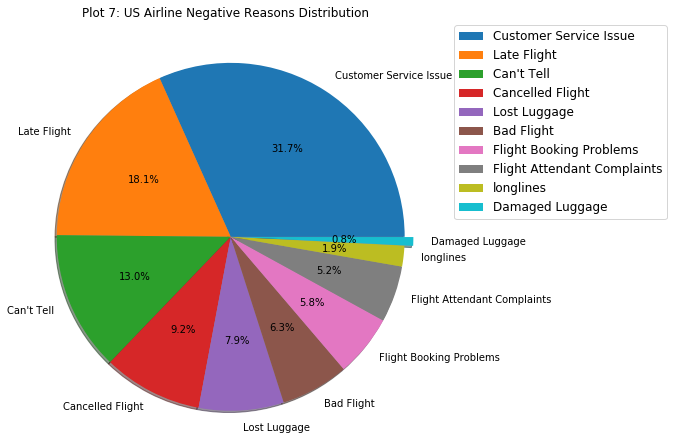

In [17]:
# Pie plot distribution of negative reasons in tweets
reasons = negative_reason_list
values = df['negativereason'].value_counts()
plt.suptitle("Plot 7: US Airline Negative Reasons Distribution",y=1.3)
wedges, plt_labels, junk  = plt.pie(values,autopct='%1.1f%%',radius=2,labels=reasons,\
                                   explode=[0,0,0,0,0,0,0,0,0,0.1],shadow=True)

plt.legend(wedges, reasons, bbox_to_anchor=(1.5,1.5),prop={'size':12});

* Biggest negative reason are: Customer services are not good , Flights are not on time, Flights getting cancelled, luggage lost etc.
* Next we'll see what are the negative reasons specific for each airline. 

### Bar Plots for Negative Reasons in Each Airline

In [18]:
def reason_each_flight(airline):
    data = df[df['airline'] == airline]
    data = data['negativereason']
    data_count = data.value_counts()
    List = data.value_counts().index.tolist()
    Index = range(1,(len(data.unique())))
    plt.bar(Index, data_count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xlabel('Negative Reasons')
    plt.ylabel('Frequency of Negative Reasons')
    plt.title('Negative Reasons in Tweets for ' + airline)
    plt.xticks(Index, List,rotation = 90)

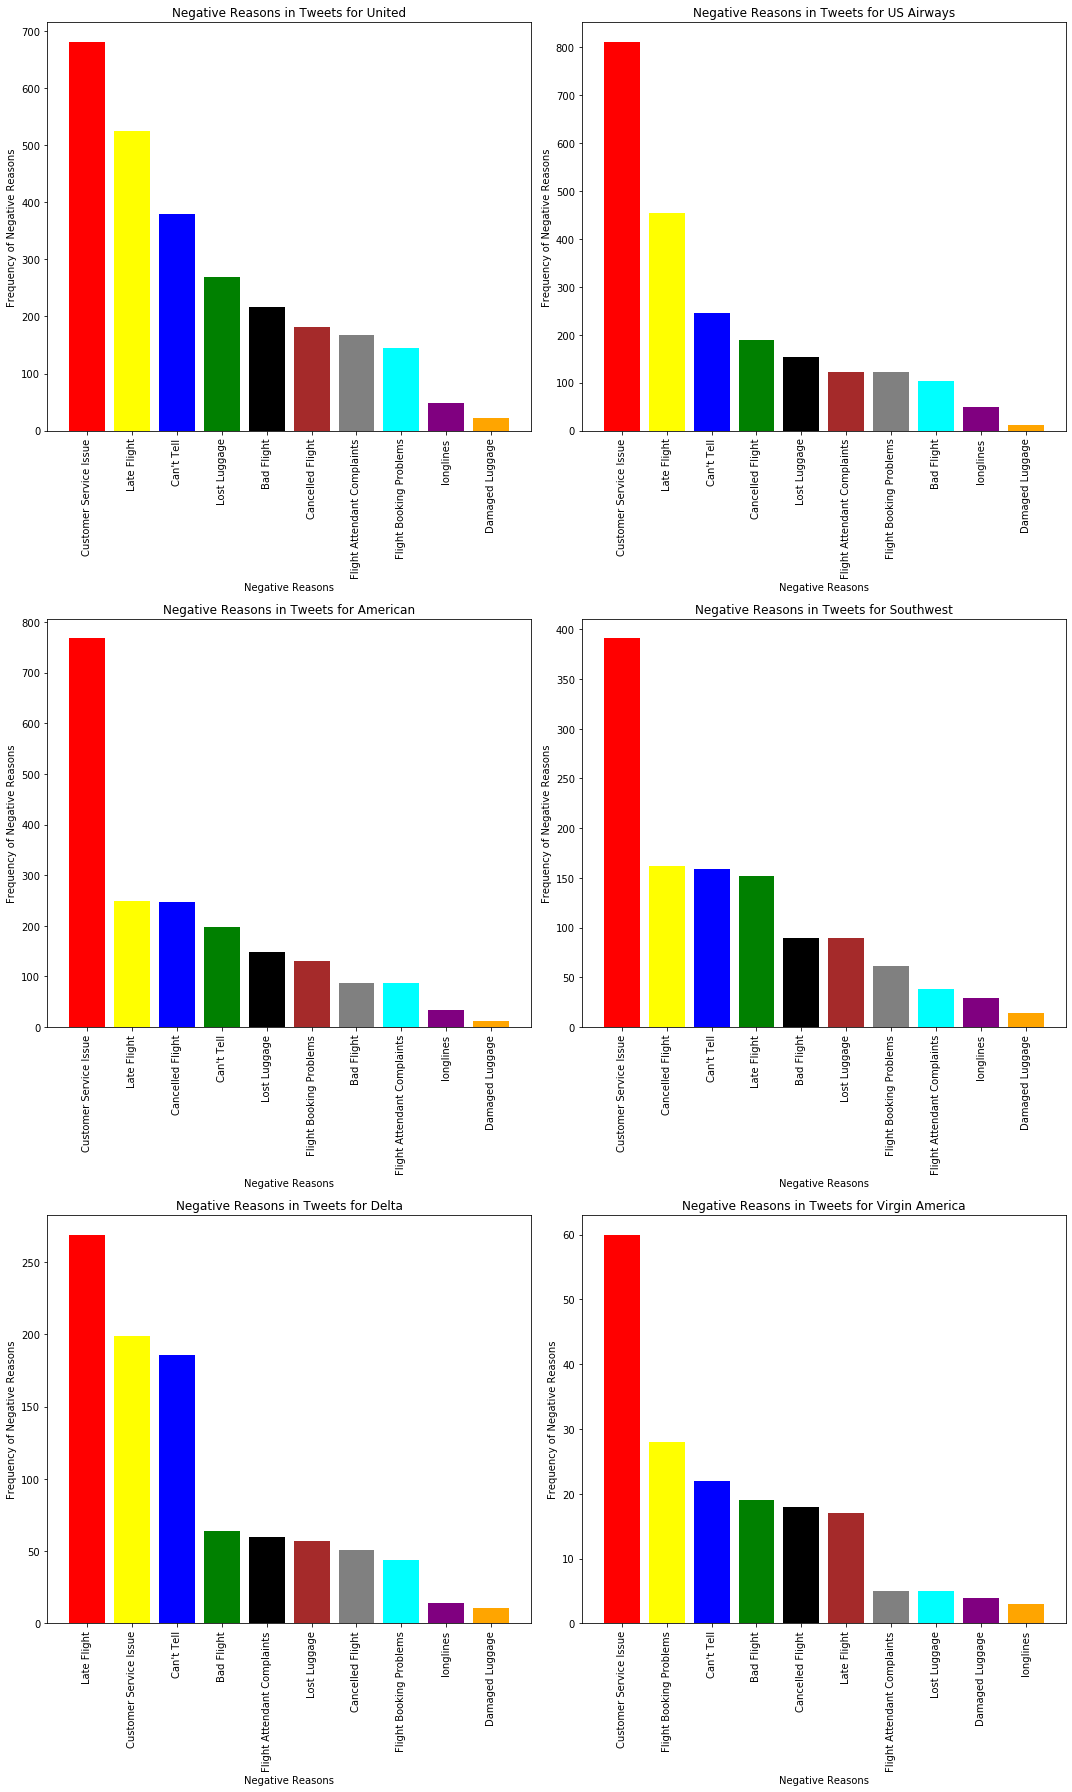

In [19]:
Air = df['airline'].value_counts().index.tolist()
plt.figure(1,figsize=(15, 25))
plt.subplot(321)
reason_each_flight(Air[0])
plt.subplot(322)
reason_each_flight(Air[1])
plt.subplot(323)
reason_each_flight(Air[2])
plt.subplot(324)
reason_each_flight(Air[3])
plt.subplot(325)
reason_each_flight(Air[4])
plt.subplot(326)
reason_each_flight(Air[5])
plt.tight_layout()

* **Customer service issue** is the major reason for negative tweets for most airlines except Delta Airlines, which has **Late Flight** as the major reason.
* Other major reasons like  **Flight Booking Issue**, **Cancelled Flight, **Late Flight** are also common in all airlines.
* **Damaged Luggage** and **Longlines** seem to be the least cause for negative tweets. Looks like they're doing a good job with handling our Luggages!!

Now let's play a bit with wordcloud to visualize what words are frequently used while citing negative reasons in tweets.. 

## Word Cloud for Negative Mood

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In this Word Cloud, we can observe the frequent words used in Negative tweets for all the Airline. 

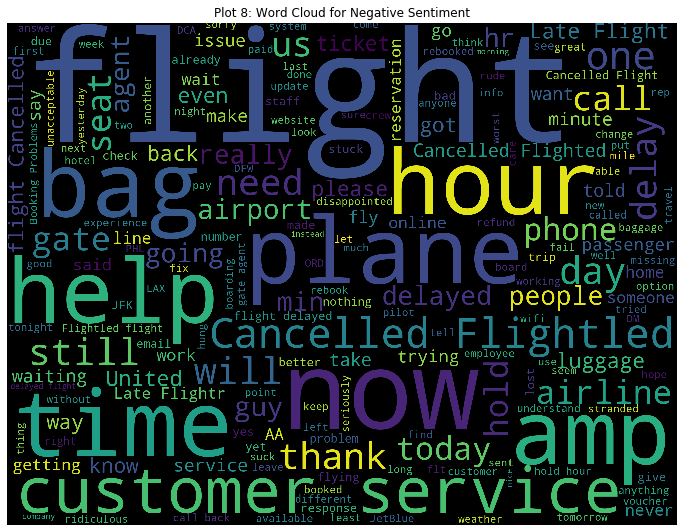

In [20]:
from wordcloud import WordCloud,STOPWORDS

df_word = df[df['airline_sentiment']=='negative'] 
# join tweets to a single string
words = ' '.join(df_word['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.title("Plot 8: Word Cloud for Negative Sentiment")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


* Here we can see that words like Flight, customer service, Cancelled flight, time etc which may indicate negative sentiment are more frequent compared to others. 
* Some words like Flight are used in conjunction with other negative words to indicate negative sentiment and they do not hold any sentiment individually.

## Word Cloud for Netural Mood

In this Word Cloud, we can observe the frequent words used in Neutral tweets for all the Airline. 

In [21]:
# df_word = df[df['airline_sentiment']=='neutral'] 
# # join tweets to a single string
# words = ' '.join(df_word['text'])
# # remove URLs, RTs, and twitter handles
# no_urls_no_tags = " ".join([word for word in words.split()
#                             if 'http' not in word
#                                 and not word.startswith('@')
#                                 and word != 'RT'
#                             ])

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='black',
#                       width=2000,
#                       height=1500
#                      ).generate(no_urls_no_tags)
# plt.figure(1,figsize=(12, 12))
# plt.title("Plot 9: Word Cloud for Neutral Sentiment")
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

* Here we can see that words like Flight, ticket, will, time etc are more frequent compared to others. 
* These words do not specify any sentiment individually unless used with other random words. In other words, they are neither negative or positive hence neutral.

## Word Cloud for Positive Mood

In this Word Cloud, we can observe the frequent words used in Positive tweets for all the Airline. 

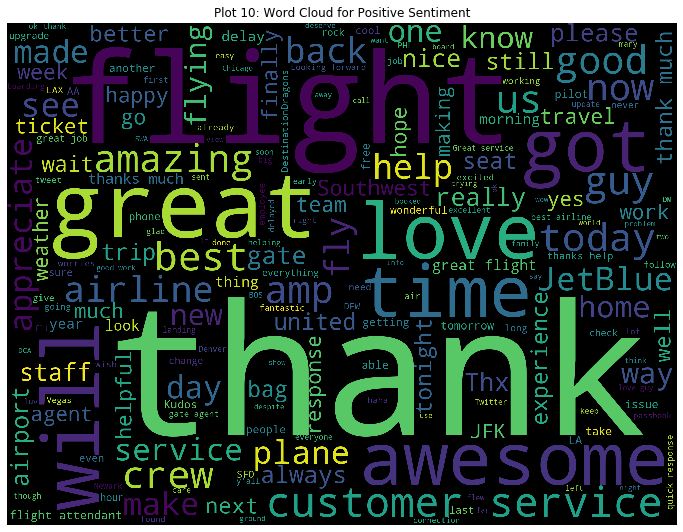

In [22]:
df_word = df[df['airline_sentiment']=='positive'] 
# join tweets to a single string
words = ' '.join(df_word['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.title("Plot 10: Word Cloud for Positive Sentiment")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Here we can see that words like Flight, Thank, love, awesome, great etc which may indicate positive sentiment are more frequent compared to others. 
* Some words like Flight, time, will etc are used in conjunction with other positive words to indicate positive sentiment and they do not hold any sentiment individually.

## More Insights from Dataset

* Now we have learned a lot by analysing the nature of sentiment of tweets of all airlines in the dataset.
* We know that there are more negative tweets comapred to positive ones in the dataset and we have also analysed the reasons for such negative tweets.
* Let's see which regions are the major contributers of the tweets in the dataset. 

### Major Locations of Tweets

In [23]:
#locations from where tweets are coming
location = df['tweet_location'].dropna(axis=0, how='all')
print (location.count())

7770


In [24]:
location.value_counts().head(10)

Washington, DC       135
New York, NY         126
Boston, MA           122
New York             105
Chicago               86
NYC                   81
Los Angeles, CA       80
San Francisco, CA     76
New York City         75
San Francisco         74
Name: tweet_location, dtype: int64

### Cordinats of Map from where Tweets are Coming

In [25]:
#cordinats of map from where tweets are coming 
cordinates = df['tweet_coord'].dropna(axis = 0, how="all")
cordinates.count()

838

In [26]:
cordinates.value_counts().head(10)

[0.0, 0.0]                      115
[40.64656067, -73.78334045]       6
[40.64646912, -73.79133606]       3
[40.69002464, -73.91638072]       2
[34.0213466, -118.45229268]       2
[35.22643463, -80.93879965]       2
[37.99311597, -84.52114659]       2
[33.75348859, -116.36209633]      2
[40.69017276, -73.91646118]       2
[37.78618135, -122.45742542]      2
Name: tweet_coord, dtype: int64

* Some of the major contributors of tweets come from Boston, New York, Washington, Chicago etc.
* The cordinates of those of most frequent locations is also listed above.

## Data Cleaning

* We've done a reasonable amount of visualization from the dataset up until now..
* Now let's clean our data so that we can apply our Classification models further down the process.
* The most important feature we need here is the tweet text and the airline_sentiment column of our dataset to train and evaluate our model.
* Let's begin..

In [27]:
tweet = pd.read_csv("Tweets.csv") #reading tweet.csv file using pandas
tweet.shape

(14640, 15)

In [28]:
df = tweet[['text','airline_sentiment']] #we need only these columns for our processing
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Remove Neutral sentiment data

In [29]:
# Get names of indexes for which column Age has value 30
indexNames = df[ df['airline_sentiment'] == 'neutral' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [30]:
df.columns = ['text', 'sentiment'] #only two column from data text and sentiment 
data= df
data.head()

,text,sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


### Clean and Tokenize the Text

* Remove any special characters and numbers and keep only the text for further processing.
* Next tokenize the text using the nltk word tokenizer

In [31]:
# removes every thing except text 
data['text']=data['text'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
# now tokenize text
data['text']=data['text'].apply(nltk.word_tokenize)
data.head() #first five row is printing after tokenized

,text,sentiment
1,"[plus, youve, added, commercials, to, the, exp...",positive
3,"[its, really, aggressive, to, blast, obnoxious...",negative
4,"[and, its, a, really, big, bad, thing, about, it]",negative
5,"[seriously, would, pay, a, flight, for, seats,...",negative
6,"[yes, nearly, every, time, I, fly, VX, this, e...",positive


### Stemming Each Word

* After tokenizing, stem each word using the nltk package Snowball Stemmer and reduce word inflection.
* Now the words are in their root forms

In [32]:
#Stemming each word 
stemmer = SnowballStemmer('english')
data['text']=data['text'].apply(lambda x: [stemmer.stem(y) for y in x])
data.head()

,text,sentiment
1,"[plus, youv, ad, commerci, to, the, experi, ta...",positive
3,"[it, realli, aggress, to, blast, obnoxi, enter...",negative
4,"[and, it, a, realli, big, bad, thing, about, it]",negative
5,"[serious, would, pay, a, flight, for, seat, th...",negative
6,"[yes, near, everi, time, i, fli, vx, this, ear...",positive


### Remove Stopwords

* Remove the useless stopwords from the data for better results.
* These may affect the results if they are not removed.

In [33]:
# removing stopword 
stopwords = nltk.corpus.stopwords.words('english')
data['text']=data['text'].apply(lambda x: [y for y in x if y not in stopwords])
data.head()

,text,sentiment
1,"[plus, youv, ad, commerci, experi, tacki]",positive
3,"[realli, aggress, blast, obnoxi, entertain, gu...",negative
4,"[realli, big, bad, thing]",negative
5,"[serious, would, pay, flight, seat, didnt, pla...",negative
6,"[yes, near, everi, time, fli, vx, ear, worm, w...",positive


### Detokenize Cleaned Dataframe

* Detokenize the data from the cleaned data for vectorizing.

In [34]:
# Detokenize cleaned dataframe for vectorizing
data['text'] = data['text'].str.join(" ")
data.head()

,text,sentiment
1,plus youv ad commerci experi tacki,positive
3,realli aggress blast obnoxi entertain guest fa...,negative
4,realli big bad thing,negative
5,serious would pay flight seat didnt playingit ...,negative
6,yes near everi time fli vx ear worm wont go away,positive


### Assign values to sentiments

* Once data is sorted, assign values to positive, negative and neutral sentiments.
* The assigned values will be something like,
    Negative = 0,
    Neutral = 1,
    Positive = 2

In [35]:
#transforming postive to 2, netural to 1, negative to 0
sentiment = sorted(data['sentiment'].unique())
sentiment_mapping = dict(zip(sentiment, range(0, len(sentiment) + 1)))
data['sentiment']  = data['sentiment'].map(sentiment_mapping).astype(int)
data.head()

,text,sentiment
1,plus youv ad commerci experi tacki,1
3,realli aggress blast obnoxi entertain guest fa...,0
4,realli big bad thing,0
5,serious would pay flight seat didnt playingit ...,0
6,yes near everi time fli vx ear worm wont go away,1


### Deleting all the data rows with Neutral Sentiment

In [36]:
# # Get names of indexes for which column Age has value 30
# indexNames = data[ data['sentiment'] == 1 ].index
# # Delete these row indexes from dataFrame
# data.drop(indexNames , inplace=True)

In [37]:
data.head()

,text,sentiment
1,plus youv ad commerci experi tacki,1
3,realli aggress blast obnoxi entertain guest fa...,0
4,realli big bad thing,0
5,serious would pay flight seat didnt playingit ...,0
6,yes near everi time fli vx ear worm wont go away,1


## Model Preparation

* We have our data ready now to be used for our model training and evaluation.
* First we split the data into train and test respectively and train our classifiers to predict the sentiments of test dataset.

### Split Data into Train and Test

* Assign input feature ie, tweet text to X.
* Assign target feature ie, sentiments to y.
* Split the data into 75% training data and 25% testing data using the train_test_split package of sklearn.

In [38]:
X = data['text']
y = data['sentiment']

In [39]:
X.head()

1                   plus youv ad commerci experi tacki
3    realli aggress blast obnoxi entertain guest fa...
4                                 realli big bad thing
5    serious would pay flight seat didnt playingit ...
6     yes near everi time fli vx ear worm wont go away
Name: text, dtype: object

In [40]:
y.head()

1    1
3    0
4    0
5    0
6    1
Name: sentiment, dtype: int32

In [41]:
#splitting data into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print ("Size of train data = ", X_train.shape,"Size of test data = ", X_test.shape)
print ("Size of target train data = ", y_train.shape, "Size of target test data = ",y_test.shape)

Size of train data =  (8655,) Size of test data =  (2886,)
Size of target train data =  (8655,) Size of target test data =  (2886,)


### Vectorize the Data

* The words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).
* The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [42]:
vect = CountVectorizer()
#  fit and transform X_train into X_tr
X_tr =  vect.fit_transform(X_train)
# transform X_test into X_te
X_te = vect.transform(X_test)
print ("After vectorizing size of x_train = ", X_tr.shape)
print ("After vectorizing size of x_test = ", X_te.shape )

After vectorizing size of x_train =  (8655, 7222)
After vectorizing size of x_test =  (2886, 7222)


## Classifier Models

A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.
* The Dataset being used here is a multiclass one having two classes to predict namely negative and positive sentiments.
* Hence we use various classification models to classify our data and test the accuracy of classification.
* The Classifiers being used now are,
    1. Random Forest Classifier
    2. Support Vector Machines Classifier
    3. Naive Bayes Classifier
    4. Logistic Regression Classifier
* For evaluating the model we check for the Accuracy and F1 scores of the models for performance evaluation.

In [44]:
classifiers = ['Random Forest', 'SVM', 'Naive Baise','Logistic Regression']
accuracies = {'us airline':[], 'test set':[]}
f1_scores = {'us airline':[], 'test set':[]}

### Random Forest Classifier

* This Classifier operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
* Random decision forests correct for decision trees’ habit of over fitting to their training set.

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_tr, y_train)
predictions = rfc.predict(X_te)
accuracy = metrics.accuracy_score(y_test, predictions)*100
accuracy

90.57519057519058

The accuracy of predicting airline tweet test data is 90.575191 % and weighted f1 score is 0.903193


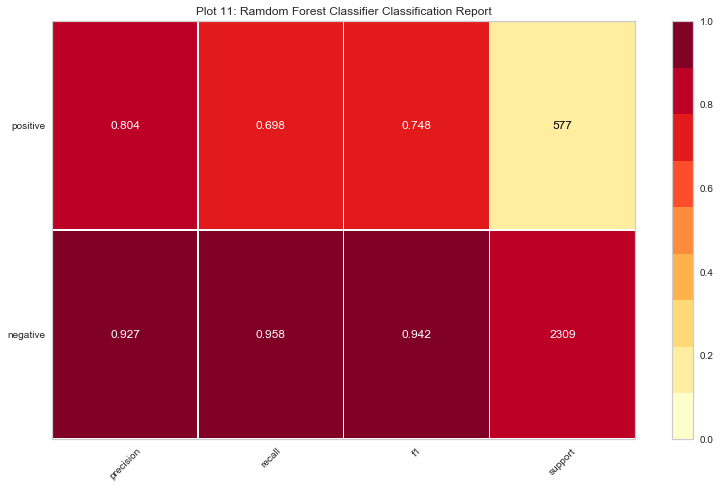

In [46]:
from sklearn.metrics import f1_score
from yellowbrick.classifier import ClassificationReport

f1 = f1_score(y_test, predictions, average='weighted')

print("The accuracy of predicting airline tweet test data is %f %% and weighted f1 score is %f" % (accuracy, f1))
accuracies['test set'].append(accuracy)
f1_scores['test set'].append(f1)

visualizer = ClassificationReport(rfc, classes= ['negative', 'positive'], support=True,\
                                  title='Plot 11: Ramdom Forest Classifier Classification Report',\
                                  size=(800,500))


visualizer.fit(X_tr, y_train)  # Fit the visualizer and the model
visualizer.score(X_te, y_test)  # Evaluate the model on the test data
visualizer.poof();

* The Random Forest Classifier gives an accuracy of around **90%** and also the corresponding weighted f1 score is approximately **0.90** which is good for our dataset.
* As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive).
* The confusion matrix shows the TP,TN,FP,FN for the 2 sentiments (negative and positive).

### Support Vector Machine Classifier

* A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. 
* In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side. Separation of classes, That’s what SVM does.

In [47]:
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(X_tr, y_train)
predictions = svc.predict(X_te)
accuracy = metrics.accuracy_score(y_test, predictions)*100
accuracy

90.95634095634095

The accuracy of predicting airline tweet test data: 90.956341 % and weighted f1 score is 0.908425


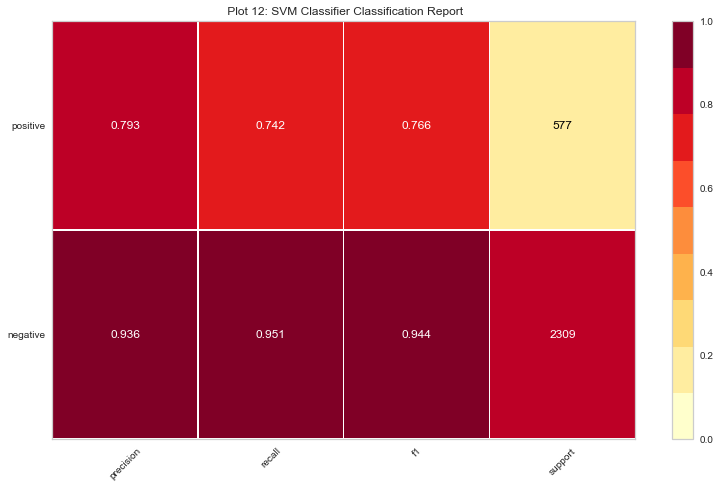

In [48]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, average='weighted')

print("The accuracy of predicting airline tweet test data: %f %% and weighted f1 score is %f" % (accuracy, f1))

accuracies['test set'].append(accuracy)
f1_scores['test set'].append(f1)

visualizer = ClassificationReport(svc, classes= ['negative', 'positive'], support=True,\
                                  title=' Plot 12: SVM Classifier Classification Report',\
                                  size=(800,500))


visualizer.fit(X_tr, y_train)  # Fit the visualizer and the model
visualizer.score(X_te, y_test)  # Evaluate the model on the test data
visualizer.poof();

* The SVM Classifier gives an accuracy of around **90.95%** and also the corresponding weighted f1 score is approximately **0.91** which is good for our dataset.
* As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive).
* The confusion matrix shows the TP,TN,FP,FN for the two sentiments(negative and positive).

### Naive Bayes Classifier

* Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
* Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

In [49]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_tr, y_train)
predictions = gnb.predict(X_te)
accuracy = metrics.accuracy_score(y_test, predictions)*100
accuracy

91.40679140679141

The accuracy predicting airline tweet test data: 91.406791 % and weighted f1 score is 0.909081


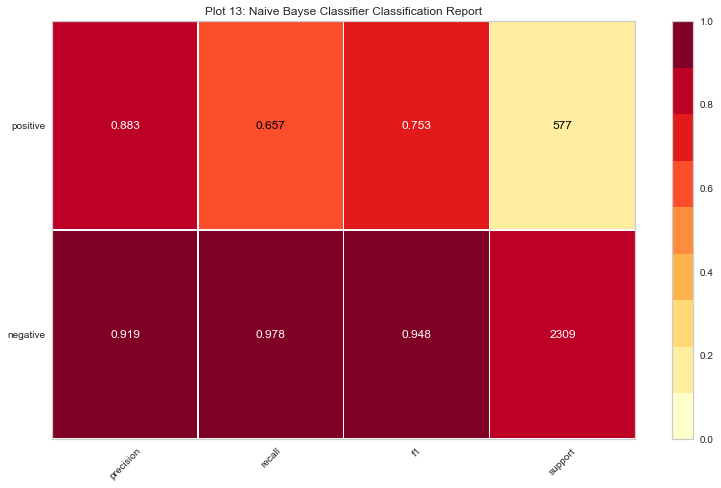

In [50]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, average='weighted')

print("The accuracy predicting airline tweet test data: %f %% and weighted f1 score is %f" % (accuracy, f1))

accuracies['test set'].append(accuracy)
f1_scores['test set'].append(f1)

visualizer = ClassificationReport(gnb, classes= ['negative', 'positive'], support=True,\
                                  title='Plot 13: Naive Bayse Classifier Classification Report',\
                                  size=(800,500))

visualizer.fit(X_tr, y_train)  # Fit the visualizer and the model
visualizer.score(X_te, y_test)  # Evaluate the model on the test data
visualizer.poof();

* The Naive bayse Classifier gives an accuracy of around **91.4%** and also the corresponding weighted f1 score is approximately **0.91** which is good for our dataset.
* As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive).
* The confusion matrix shows the TP,TN,FP,FN for the 2 sentiments(negative and positive).

### Logistic Regression Classifier

* It is a statistical method for analysing a data set in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).
* The goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. This is better than other binary classification like nearest neighbor since it also explains quantitatively the factors that lead to classification.

In [51]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_tr, y_train)
predictions = lgr.predict(X_te)
accuracy = metrics.accuracy_score(y_test, predictions)*100
accuracy

92.37699237699238

The accuracy predicting airline tweet test data: 92.376992 % and weighted f1 score is 0.921398


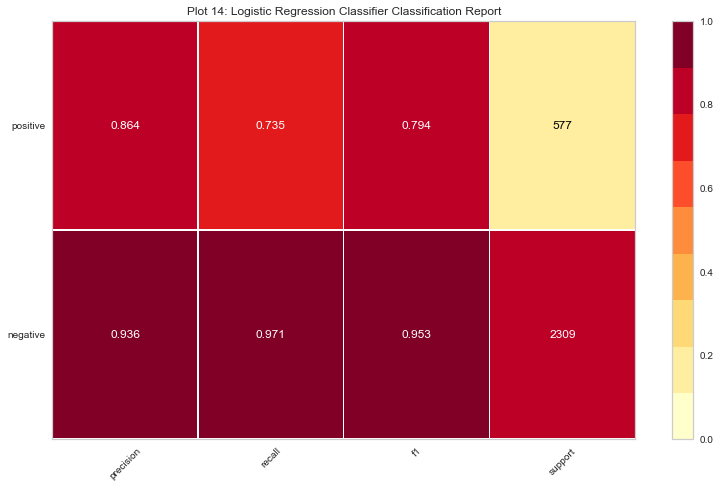

In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, average='weighted')

print("The accuracy predicting airline tweet test data: %f %% and weighted f1 score is %f" % (accuracy, f1))

accuracies['test set'].append(accuracy)
f1_scores['test set'].append(f1)

visualizer = ClassificationReport(lgr, classes= ['negative', 'positive'], support=True,\
                                  title='Plot 14: Logistic Regression Classifier Classification Report',\
                                  size=(800,500))

visualizer.fit(X_tr, y_train)  # Fit the visualizer and the model
visualizer.score(X_te, y_test)  # Evaluate the model on the test data
visualizer.poof();

* The Logistic Regression Classifier gives an accuracy of around **92.3%** and also the corresponding weighted f1 score is approximately **0.92** which is good for our dataset.
* As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive).
* The confusion matrix shows the TP,TN,FP,FN for positive and negative sentiments.

## Compare Classifier Models

* Once we've got the results from all the models, compare them to analyse the results.
* Plot the Accuracy and F1 scores for all the classification models and compare the results. 

In [53]:
accuracies, f1_scores

({'us airline': [],
  'test set': [90.57519057519058,
   90.95634095634095,
   91.40679140679141,
   92.37699237699238]},
 {'us airline': [],
  'test set': [0.9031925966005947,
   0.9084249938565674,
   0.9090811031687802,
   0.9213975663614509]})

In [54]:
def autolabel(rects, isfloat=False):
    """
    Attach a text label above each bar displaying its height
    """
    if isfloat:
      for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                  '%.2f' % float(height),
                  ha='center', va='bottom')
    else:
      for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                  '%d' % int(height),
                  ha='center', va='bottom')

### Accuracy Comparison

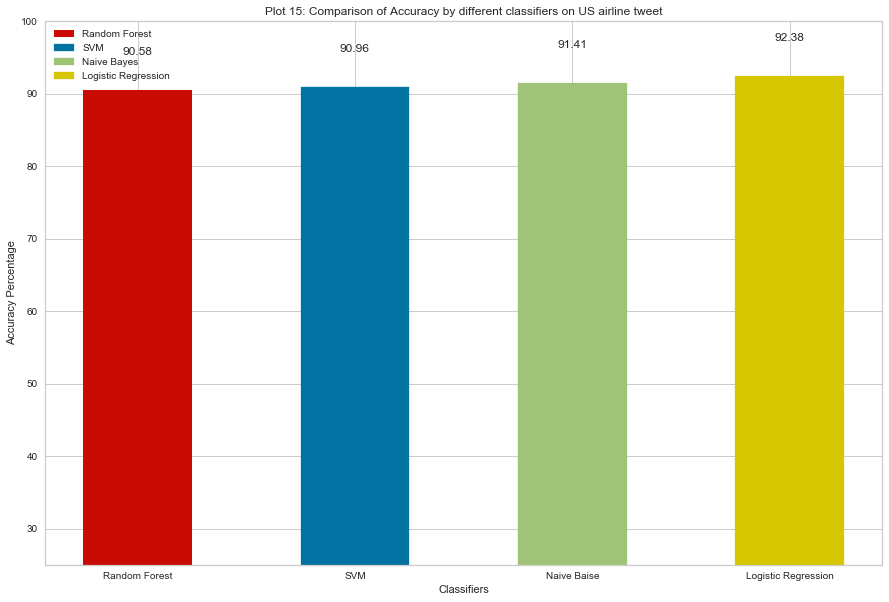

In [57]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15,10))

ind = np.arange(len(classifiers))
width = 0.5
p1 = ax.bar(ind,accuracies['test set'],width,color='r',bottom=0)

autolabel(p1,isfloat=True)

ax.set_title('Plot 15: Comparison of Accuracy by different classifiers on US airline tweet')
ax.set_ylabel('Accuracy Percentage')
ax.set_xlabel('Classifiers')
ax.set_xticks(ind)
ax.set_xticklabels(classifiers)
ax.set_ylim(25,100)
p1[1].set_color('b')
p1[2].set_color('g')
p1[3].set_color('y')


ax.legend((p1), ('Random Forest', 'SVM', 'Naive Bayes','Logistic Regression'))

plt.show()

* **Logistic Regression Classifier** gives us the best accuracy score, precision scores according to the classification report.
* The other 3 classifiers also give good results comparitively with all the other results being relatively close.
* Since we have only 3 classes in this problem the results are very similar.

### F1 Score

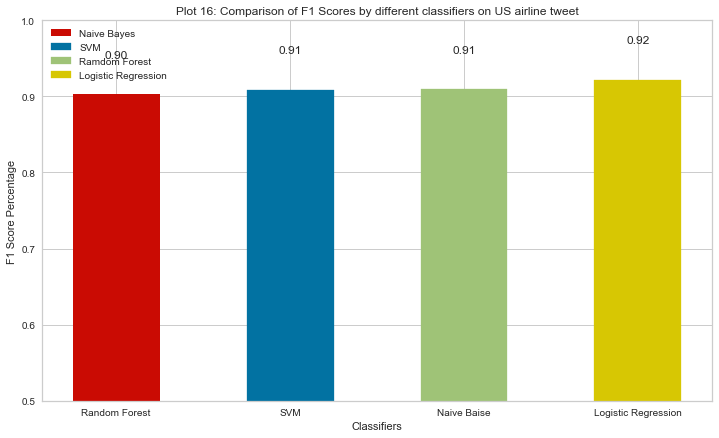

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12,7))

ind = np.arange(len(classifiers))
width = 0.5
p1 = ax.bar(ind,f1_scores['test set'],width,color='r',bottom=0)
# p2 = ax.bar(ind, accuracies['us airline'], width, color='r', bottom=0)

# autolabel(p1,isfloat=True)
autolabel(p1,isfloat=True)

ax.set_title('Plot 16: Comparison of F1 Scores by different classifiers on US airline tweet')
ax.set_ylabel('F1 Score Percentage')
ax.set_xlabel('Classifiers')
ax.set_xticks(ind)
ax.set_xticklabels(classifiers)
ax.set_ylim(0.5,1)
p1[1].set_color('b')
p1[2].set_color('g')
p1[3].set_color('y')


ax.legend((p1), ('Naive Bayes', 'SVM', 'Ramdom Forest','Logistic Regression'))

plt.show()

* **Logistic Regression Classifier** gives us the best F1 score of **0.92** followed by **SVM** with **0.91** according to the classification report.
* The other 2 classifiers also give good results comparitively.

## VADER Implementation with Neutral Sentiment

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
* VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
* The purpose of using VADER Sentiment Analyser is to check what percentage of data is matching from the predicted sentiment. 
* The future work with this will be assign sentiment values based on VADER scores and evaluate the performance of the Classifiers with this new dataset. 

In [106]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [107]:
sentences = pd.read_csv('Tweets.csv')
len(sentences)

14640

In [108]:
sentences.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [109]:
sentences.columns #I dont need all the columns for this

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [110]:
sentences = sentences[['airline_sentiment', 'airline','text' ]] #this is all that's required
sentences.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


### Example of VADER Scores

In [111]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [112]:
print_sentiment_scores("United flight was a bad experience") #Compound value scale = -1 to 1 (-ve to +ve)

United flight was a bad experience------ {'neg': 0.376, 'neu': 0.323, 'pos': 0.301, 'compound': -0.1779}


* The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 30.1% Positive, 32.3% Neutral and 37.6% Negative. Hence all these should add up to 1.
* The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

### Calculating score for each tweet in the dataframe/dataset
Pass the tweet text to the VADER tool assign scores for every tweet.

In [113]:
i=0 #counter
compval = [ ]  #empty list to hold our computed 'compound' VADER scores
while (i<len(sentences)):
    k = analyser.polarity_scores(sentences.iloc[i]['text'])
    compval.append(k['compound'])    
    i = i+1

In [114]:
#converting sentiment values to numpy for easier usage
compval = np.array(compval)
len(compval)

14640

In [115]:
# Adding a column of VADER scores to the Airline Twitter Dataset 
sentences['VADER score'] = compval
sentences.head(10)

,airline_sentiment,airline,text,VADER score
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.0000
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.0000
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0.0000
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,-0.5984
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.5829
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,-0.5945
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",0.6908
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...,0.1458
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",-0.3477
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",0.7717


### Assign Score Categories

* We would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative with the following threshold values. 
    1. positive sentiment: compound score >= 0.07
    2. neutral sentiment: (compound score > 0) and (compound score < 0.07)
    3. negative sentiment: compound score <= 0

In [116]:
#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['VADER score'] > 0) & (sentences.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

In [117]:
sentences['predicted sentiment'] = predicted_value
sentences.head(10)

,airline_sentiment,airline,text,VADER score,predicted sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.0000,negative
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.0000,negative
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0.0000,negative
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,-0.5984,negative
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.5829,negative
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,-0.5945,negative
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",0.6908,neutral
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...,0.1458,neutral
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",-0.3477,negative
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",0.7717,positive


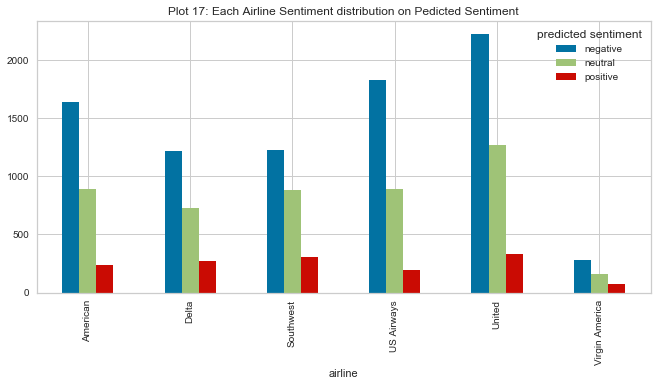

In [118]:
# sentences.groupby('predicted sentiment').size().plot(kind='bar')
sentences.groupby(['airline', 'predicted sentiment']).size().unstack().plot(kind='bar',
                                                                            figsize=(11, 5),
                                                                            title = "Plot 17: Each Airline Sentiment distribution on Pedicted Sentiment");

## Comparing Sentiments from VADER and Dataset

### Calculate the percentage of matching data of Airline Dataset with new Dataset from predicted sentiment.  

In [119]:
# Matching values with dataset
matching = sentences[sentences['airline_sentiment']== sentences['predicted sentiment']]
matching_percent = len(matching) / len(sentences) * 100
print (f"The percentage of sentiments from dataset matching with VADER sentiments ie, Accuracy = {round(matching_percent,2)}%")

The percentage of sentiments from dataset matching with VADER sentiments ie, Accuracy = 57.76%


In [120]:
matching.head(10)

,airline_sentiment,airline,text,VADER score,predicted sentiment
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,-0.5984,negative
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.5829,negative
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,-0.5945,negative
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...,0.1458,neutral
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",0.7717,positive
11,positive,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...,0.8863,positive
15,negative,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.,-0.4466,negative
19,positive,Virgin America,@VirginAmerica you know what would be amazingl...,0.7821,positive
20,negative,Virgin America,@VirginAmerica why are your first fares in May...,0.0000,negative
22,positive,Virgin America,@VirginAmerica I love the hipster innovation. ...,0.8658,positive


In [121]:
matching.iloc[15]

airline_sentiment                                                neutral
airline                                                   Virgin America
text                   Nice RT @VirginAmerica: Vibe with the moodligh...
VADER score                                                       0.4215
predicted sentiment                                              neutral
Name: 35, dtype: object

In [122]:
matching['predicted sentiment'].value_counts()

negative    6378
neutral     1182
positive     896
Name: predicted sentiment, dtype: int64

### Plot of Sentiment Counts from Matching Data

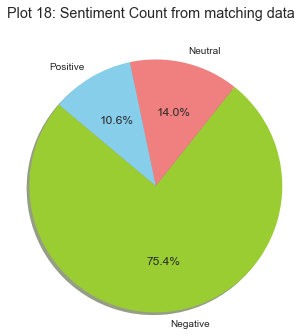

In [123]:
# pie plot for total percentage of matching predicted airline sentiment
plt.figure(figsize=(5,5))
labels = 'Negative', 'Neutral', 'Positive'
sizes = matching['predicted sentiment'].value_counts().tolist()
colors = ['yellowgreen', 'lightcoral', 'skyblue']
explode = (0, 0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.suptitle("Plot 18: Sentiment Count from matching data", y=1) 
plt.axis('equal')
plt.show()

### Calculate the percentage of unmatching data of Airline Dataset with new Dataset from predicted sentiment.  

In [124]:
# Not matching values with dataset
not_matching = sentences[sentences['airline_sentiment'] != sentences['predicted sentiment']]
not_matching_percent = len(not_matching) / len(sentences) * 100
print (f"The percentage of sentiments from dataset not matching with VADER sentiments ie, Accuracy = {round(not_matching_percent,2)}%")

The percentage of sentiments from dataset not matching with VADER sentiments ie, Accuracy = 42.24%


In [125]:
not_matching.head(10)

,airline_sentiment,airline,text,VADER score,predicted sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.0000,negative
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.0000,negative
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0.0000,negative
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",0.6908,neutral
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",-0.3477,negative
10,neutral,Virgin America,@VirginAmerica did you know that suicide is th...,-0.8555,negative
12,positive,Virgin America,@VirginAmerica This is such a great deal! Alre...,0.6892,neutral
13,positive,Virgin America,@VirginAmerica @virginmedia I'm flying your #f...,0.0000,negative
14,positive,Virgin America,@VirginAmerica Thanks!,0.4926,neutral
16,positive,Virgin America,@VirginAmerica So excited for my first cross c...,-0.5566,negative


In [126]:
not_matching.iloc[25]

airline_sentiment                                                neutral
airline                                                   Virgin America
text                   @VirginAmerica plz help me win my bid upgrade ...
VADER score                                                        0.826
predicted sentiment                                             positive
Name: 42, dtype: object

In [127]:
not_matching.iloc[25]['text']

'@VirginAmerica plz help me win my bid upgrade for my flight 2/27 LAX---&gt;SEA!!!  🍷👍💺✈️'

* From the above example we can see that, for the given tweet the sentiment given in the dataset is correct and not the one given by VADER. 
* This shows that the values from this tool may not give good accuracy with the Classifier models.
* This can be further explored in the future.

In [128]:
not_matching['predicted sentiment'].value_counts()

neutral     3638
negative    2040
positive     506
Name: predicted sentiment, dtype: int64

### Plot of Sentiment Counts from Not Matching Data

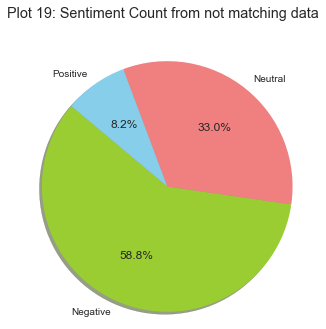

In [129]:
# pie plot for total percentage of predicted airline sentiment
plt.figure(figsize=(5,5))
labels = 'Negative', 'Neutral', 'Positive'
sizes = not_matching['predicted sentiment'].value_counts().tolist()
colors = ['yellowgreen', 'lightcoral', 'skyblue']
explode = (0, 0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.suptitle("Plot 19: Sentiment Count from not matching data", y=1) 
plt.axis('equal')
plt.show()

## Percentage of matching predicted sentiment with airline sentiment

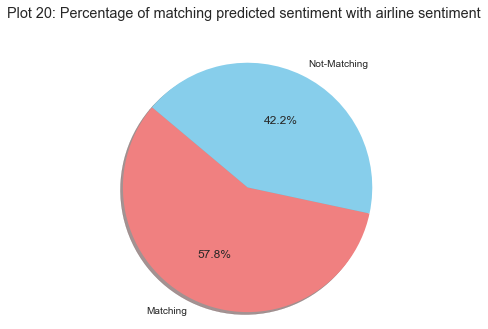

In [130]:
# pie plot for total percentage of matching predicted airline sentiment
plt.figure(figsize=(5,5))
labels = 'Matching', 'Not-Matching'
sizes = [len(matching), len(not_matching)]
colors = ['lightcoral', 'skyblue']
explode = (0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.suptitle("Plot 20: Percentage of matching predicted sentiment with airline sentiment", y=1) 
plt.axis('equal')
plt.show()